In [49]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import requests
from scipy.stats import linregress

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90, high=90, size=1500)
lngs = np.random.uniform(low=-180, high=180, size=1500)
coords = zip(lats, lngs)
coords

In [3]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(coords)

In [6]:
from citipy import citipy

In [7]:
# for coordinate in coordinates:
#     print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
#           citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# append Fort Worth to cities, as that is where I live
cities.append('fort worth')
# Print the city count to confirm sufficient count.
len(cities)

636

In [9]:
url = f'http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}'

In [10]:
# 1. Import our dependencies and initialize counters and an empty list that will hold the weather data.
# 2. Loop through the cities list.
# 3. Group the cities in sets of 50 to log the process as we find the weather data for each city.
    # Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
# 4. Build the city_url or endpoint for each city.
# 5. Log the URL and the record and set numbers.
# 6. Make an API request for each city.
# 7. Parse the JSON weather data for the following:
    # City, country, and date
    # Latitude and longitude
    # Maximum temperature
    # Humidity
    # Cloudiness
    # Wind speed
# 8. Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [11]:
cities_data = []

In [13]:
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = f'{url}&q={city.replace(" ","+")}'
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        cities_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | gat
Processing Record 4 of Set 1 | belmopan
Processing Record 5 of Set 1 | kajaani
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 9 of Set 1 | besancon
Processing Record 10 of Set 1 | muros
Processing Record 11 of Set 1 | kaitangata
Processing Record 12 of Set 1 | port elizabeth
Processing Record 13 of Set 1 | batticaloa
Processing Record 14 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 15 of Set 1 | ambilobe
Processing Record 16 of Set 1 | zlobin
Processing Record 17 of Set 1 | kodiak
Processing Record 18 of Set 1 | mata grande
Processing Record 19 of Set 1 | lorengau
Processing Record 20 of Set 1 | wanning
Processing Record 21 of Set 1 | marcona
City not fo

Processing Record 33 of Set 4 | kristiinankaupunki
Processing Record 34 of Set 4 | broome
Processing Record 35 of Set 4 | aitape
Processing Record 36 of Set 4 | udachnyy
Processing Record 37 of Set 4 | mayumba
Processing Record 38 of Set 4 | coos bay
Processing Record 39 of Set 4 | torbay
Processing Record 40 of Set 4 | barawe
City not found. Skipping...
Processing Record 41 of Set 4 | kedgwick
Processing Record 42 of Set 4 | pacific grove
Processing Record 43 of Set 4 | talnakh
Processing Record 44 of Set 4 | cayenne
Processing Record 45 of Set 4 | piotrkow trybunalski
Processing Record 46 of Set 4 | cam pha
City not found. Skipping...
Processing Record 47 of Set 4 | hobyo
Processing Record 48 of Set 4 | ponta do sol
Processing Record 49 of Set 4 | nova olimpia
Processing Record 50 of Set 4 | tasiilaq
Processing Record 1 of Set 5 | katobu
Processing Record 2 of Set 5 | yeniseysk
Processing Record 3 of Set 5 | ribeira grande
Processing Record 4 of Set 5 | kon tum
Processing Record 5 of

Processing Record 22 of Set 8 | betafo
Processing Record 23 of Set 8 | saldanha
Processing Record 24 of Set 8 | carnarvon
Processing Record 25 of Set 8 | krosno
Processing Record 26 of Set 8 | sungaipenuh
Processing Record 27 of Set 8 | codrington
Processing Record 28 of Set 8 | porto novo
Processing Record 29 of Set 8 | tufulele
City not found. Skipping...
Processing Record 30 of Set 8 | auki
Processing Record 31 of Set 8 | kruisfontein
Processing Record 32 of Set 8 | zhezkazgan
Processing Record 33 of Set 8 | ilo
Processing Record 34 of Set 8 | villamontes
Processing Record 35 of Set 8 | ilebo
Processing Record 36 of Set 8 | qasigiannguit
Processing Record 37 of Set 8 | alampur
Processing Record 38 of Set 8 | nara
Processing Record 39 of Set 8 | havoysund
Processing Record 40 of Set 8 | bonito oriental
Processing Record 41 of Set 8 | sisimiut
Processing Record 42 of Set 8 | chuy
Processing Record 43 of Set 8 | corrooy
Processing Record 44 of Set 8 | qui nhon
Processing Record 45 of S

Processing Record 9 of Set 12 | bur gabo
City not found. Skipping...
Processing Record 10 of Set 12 | maraba
Processing Record 11 of Set 12 | marawi
Processing Record 12 of Set 12 | barbar
City not found. Skipping...
Processing Record 13 of Set 12 | altyn-topkan
Processing Record 14 of Set 12 | toliary
City not found. Skipping...
Processing Record 15 of Set 12 | saint-augustin
Processing Record 16 of Set 12 | sao gabriel da cachoeira
Processing Record 17 of Set 12 | chauk
Processing Record 18 of Set 12 | hoquiam
Processing Record 19 of Set 12 | kalengwa
Processing Record 20 of Set 12 | guerrero negro
Processing Record 21 of Set 12 | santarem
Processing Record 22 of Set 12 | tiarei
Processing Record 23 of Set 12 | nichinan
Processing Record 24 of Set 12 | danielskuil
Processing Record 25 of Set 12 | asandh
Processing Record 26 of Set 12 | salalah
Processing Record 27 of Set 12 | egvekinot
Processing Record 28 of Set 12 | naze
Processing Record 29 of Set 12 | luziania
Processing Record 3

In [16]:
len(cities_data)

574

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data = pd.DataFrame(cities_data)
city_data.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.7297,-155.0900,75.27,84,74,3.40,US,2021-09-21 16:08:48
1,Albany,42.6001,-73.9662,72.03,68,100,1.01,US,2021-09-21 16:13:22
2,Gat,31.6100,34.7642,84.40,100,0,11.36,IL,2021-09-21 16:13:22
3,Belmopan,17.2500,-88.7667,87.30,79,100,5.23,BZ,2021-09-21 16:08:41
4,Kajaani,64.2273,27.7285,39.11,76,24,5.79,FI,2021-09-21 16:13:22
5,Rikitea,-23.1203,-134.9692,73.67,71,0,14.76,PF,2021-09-21 16:13:23
6,Besancon,47.2488,6.0182,69.53,15,2,9.10,FR,2021-09-21 16:13:23
7,Muros,42.7762,-9.0603,78.24,54,1,14.27,ES,2021-09-21 16:13:23
8,Kaitangata,-46.2817,169.8464,39.34,90,12,7.00,NZ,2021-09-21 16:13:24
9,Port Elizabeth,-33.9180,25.5701,59.09,71,98,6.89,ZA,2021-09-21 16:13:24


In [18]:
column_order = ['City',
               'Country',
               'Date',
               'Lat',
               'Lng',
               'Max Temp',
               'Humidity',
               'Cloudiness',
               'Wind Speed']
city_data = city_data[column_order]
city_data.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hilo,US,2021-09-21 16:08:48,19.7297,-155.0900,75.27,84,74,3.40
1,Albany,US,2021-09-21 16:13:22,42.6001,-73.9662,72.03,68,100,1.01
2,Gat,IL,2021-09-21 16:13:22,31.6100,34.7642,84.40,100,0,11.36
3,Belmopan,BZ,2021-09-21 16:08:41,17.2500,-88.7667,87.30,79,100,5.23
4,Kajaani,FI,2021-09-21 16:13:22,64.2273,27.7285,39.11,76,24,5.79


In [21]:
# Create the output file (CSV).
output_file_path = "resources/cities.csv"
# Export the City_Data into a CSV.
city_data.to_csv(output_file_path, index_label="City_ID")

In [22]:
# We'll create scatter plots for latitude vs. maximum temperature, humidity, cloudiness, and wind speed.
# The first, latitude vs. maximum temperature, should look like the following scatter plot.

In [29]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data["Lat"]
lngs = city_data["Lng"]
max_temps = city_data["Max Temp"]
humidity = city_data["Humidity"]
cloudiness = city_data["Cloudiness"]
wind_speed = city_data["Wind Speed"]

In [30]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'09/21/21'

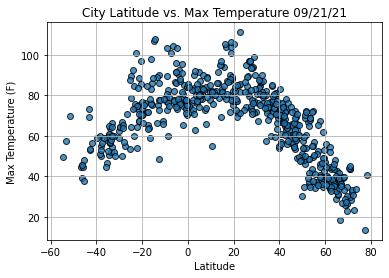

In [34]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("analysis/Fig1.png")

# Show plot.
plt.show()

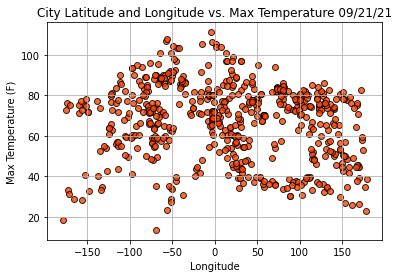

In [44]:
# Build the scatter plot for longitude vs. max temperature.
plt.scatter(lngs,
            max_temps,
            color='orangered', edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude and Longitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Longitude")
plt.grid(True)

# Save the figure.
plt.savefig("analysis/Fig1_1.png")

# Show plot.
plt.show()

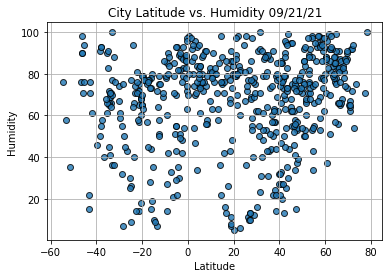

In [37]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("analysis/Fig2.png")

# Show plot.
plt.show()

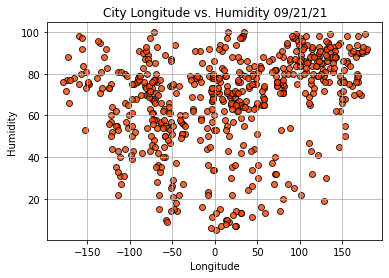

In [45]:
# Build the scatter plot for longitude vs. humidity.
plt.scatter(lngs,
            humidity,
            color='orangered', edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Longitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Longitude")
plt.grid(True)

# Save the figure.
plt.savefig("analysis/Fig2_1.png")

# Show plot.
plt.show()

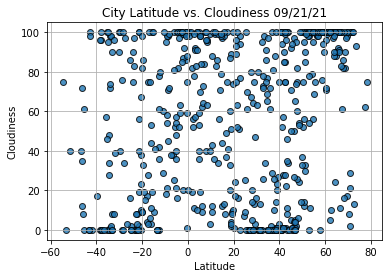

In [38]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("analysis/Fig3.png")

# Show plot.
plt.show()

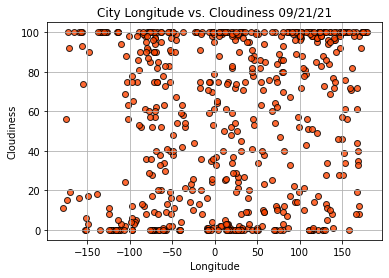

In [46]:
# Build the scatter plot for longitude vs. cloudiness.
plt.scatter(lngs,
            cloudiness,
            color='orangered', edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Longitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Longitude")
plt.grid(True)

# Save the figure.
plt.savefig("analysis/Fig3_1.png")

# Show plot.
plt.show()

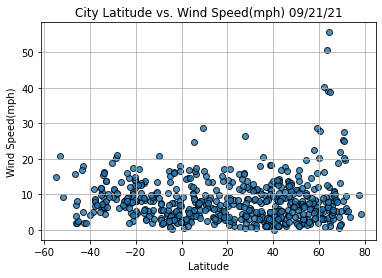

In [39]:
# Build the scatter plot for latitude vs. wind_speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed(mph) "+ time.strftime("%x"))
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("analysis/Fig4.png")

# Show plot.
plt.show()

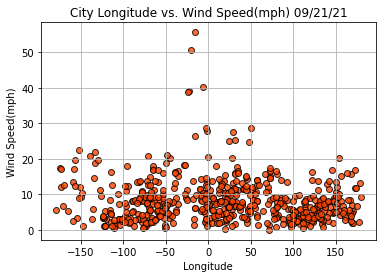

In [47]:
# Build the scatter plot for longitude vs. wind_speed.
plt.scatter(lngs,
            wind_speed,
            color='orangered', edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Longitude vs. Wind Speed(mph) "+ time.strftime("%x"))
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Longitude")
plt.grid(True)

# Save the figure.
plt.savefig("analysis/Fig4_1.png")

# Show plot.
plt.show()

In [65]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, x_label, y_label, text_coordinates, color):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values, c=color,
                edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [53]:
northern_hemisphere = city_data.loc[(city_data["Lat"] >= 0)]
southern_hemisphere = city_data.loc[(city_data["Lat"] <= 0)]

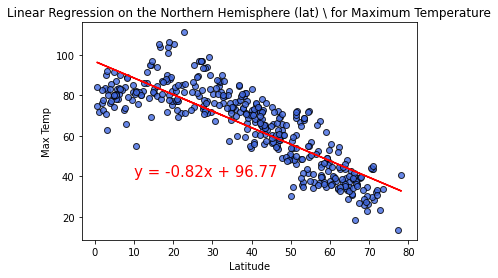

In [72]:
# Linear regression on the Northern Hemisphere (lat)

# Call the function.
plot_linear_regression(northern_hemisphere["Lat"],
                        northern_hemisphere["Max Temp"],
                        'Linear Regression on the Northern Hemisphere (lat) \ for Maximum Temperature',
                        'Latitude',
                        'Max Temp',
                        (10,40),
                        'royalblue')

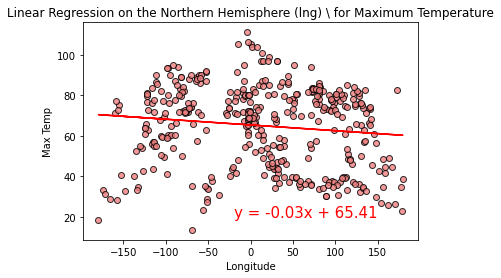

In [73]:
# Linear regression on the Northern Hemisphere (lng)

# Call the function.
plot_linear_regression(northern_hemisphere["Lng"],
                        northern_hemisphere["Max Temp"],
                        'Linear Regression on the Northern Hemisphere (lng) \ for Maximum Temperature',
                        'Longitude',
                        'Max Temp',
                        (-20,20),
                        'lightcoral')

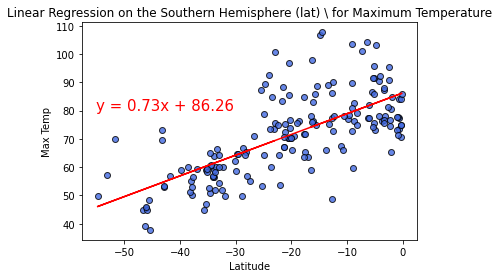

In [79]:
# Linear regression on the Southern Hemisphere (lat)

# Call the function.
plot_linear_regression(southern_hemisphere["Lat"],
                        southern_hemisphere["Max Temp"],
                        'Linear Regression on the Southern Hemisphere (lat) \ for Maximum Temperature',
                        'Latitude',
                        'Max Temp',
                        (-55,80),
                        'royalblue')

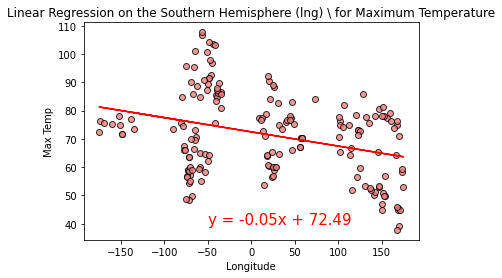

In [81]:
# Linear regression on the Southern Hemisphere (lng)

# Call the function.
plot_linear_regression(southern_hemisphere["Lng"],
                        southern_hemisphere["Max Temp"],
                        'Linear Regression on the Southern Hemisphere (lng) \ for Maximum Temperature',
                        'Longitude',
                        'Max Temp',
                        (-50,40),
                        'lightcoral')

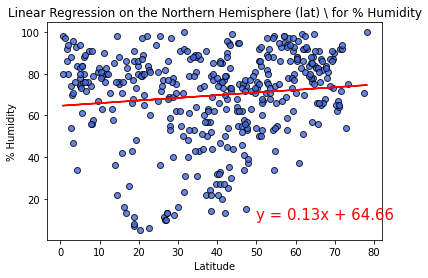

In [83]:
# Linear regression on the Northern Hemisphere (lat)

# Call the function.
plot_linear_regression(northern_hemisphere["Lat"],
                        northern_hemisphere["Humidity"],
                        'Linear Regression on the Northern Hemisphere (lat) \ for % Humidity',
                        'Latitude',
                        '% Humidity',
                        (50,10),
                        'royalblue')

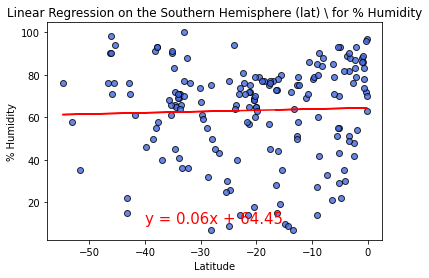

In [86]:
# Linear regression on the Southern Hemisphere (lat)

# Call the function.
plot_linear_regression(southern_hemisphere["Lat"],
                        southern_hemisphere["Humidity"],
                        'Linear Regression on the Southern Hemisphere (lat) \ for % Humidity',
                        'Latitude',
                        '% Humidity',
                        (-40,10),
                        'royalblue')

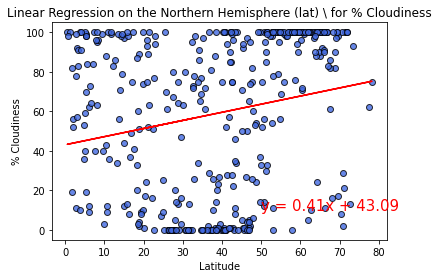

In [87]:
# Linear regression on the Northern Hemisphere (lat)

# Call the function.
plot_linear_regression(northern_hemisphere["Lat"],
                        northern_hemisphere["Cloudiness"],
                        'Linear Regression on the Northern Hemisphere (lat) \ for % Cloudiness',
                        'Latitude',
                        '% Cloudiness',
                        (50,10),
                        'royalblue')

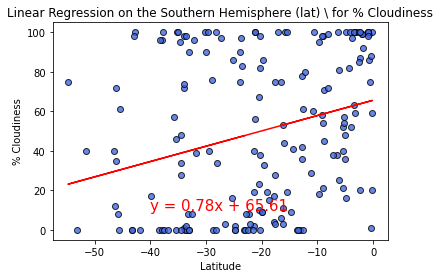

In [88]:
# Linear regression on the Southern Hemisphere (lat)

# Call the function.
plot_linear_regression(southern_hemisphere["Lat"],
                        southern_hemisphere["Cloudiness"],
                        'Linear Regression on the Southern Hemisphere (lat) \ for % Cloudiness',
                        'Latitude',
                        '% Cloudiness',
                        (-40,10),
                        'royalblue')

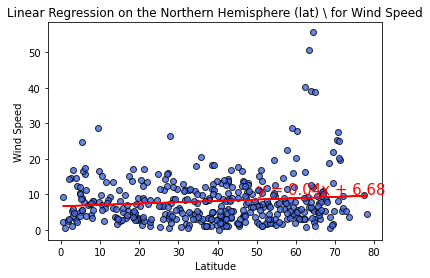

In [89]:
# Linear regression on the Northern Hemisphere (lat)

# Call the function.
plot_linear_regression(northern_hemisphere["Lat"],
                        northern_hemisphere["Wind Speed"],
                        'Linear Regression on the Northern Hemisphere (lat) \ for Wind Speed',
                        'Latitude',
                        'Wind Speed',
                        (50,10),
                        'royalblue')

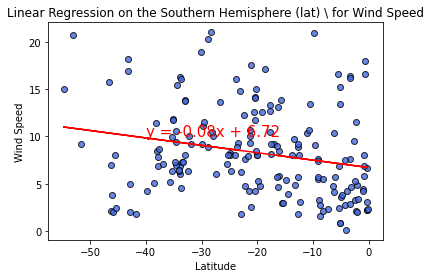

In [90]:
# Linear regression on the Southern Hemisphere (lat)

# Call the function.
plot_linear_regression(southern_hemisphere["Lat"],
                        southern_hemisphere["Wind Speed"],
                        'Linear Regression on the Southern Hemisphere (lat) \ for Wind Speed',
                        'Latitude',
                        'Wind Speed',
                        (-40,10),
                        'royalblue')